In [11]:
import itertools
import matplotlib.pyplot as plt
import pywt

In [12]:
fig_size = [0,0]
fig_size[0] = 14
fig_size[1] = 11
plt.rcParams["figure.figsize"] = fig_size

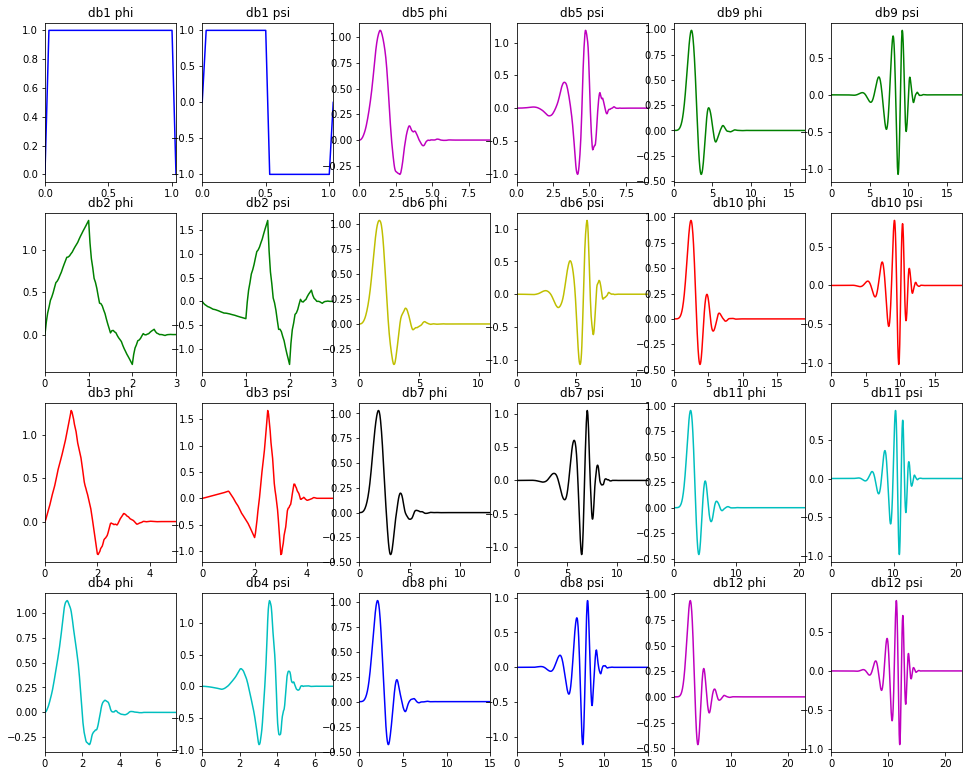

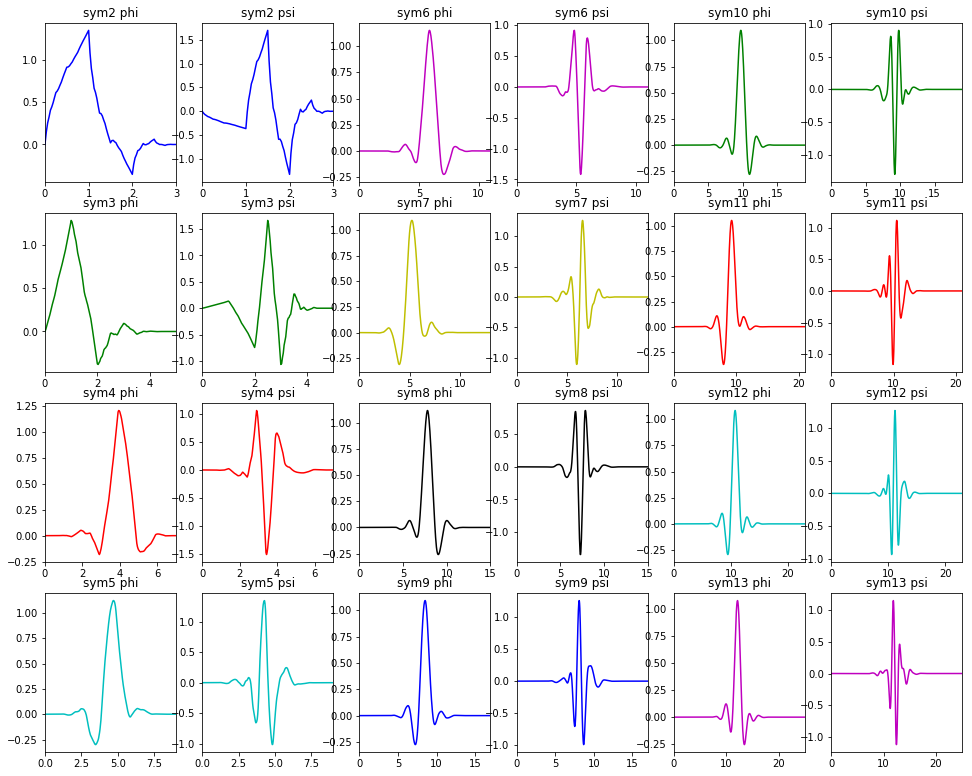

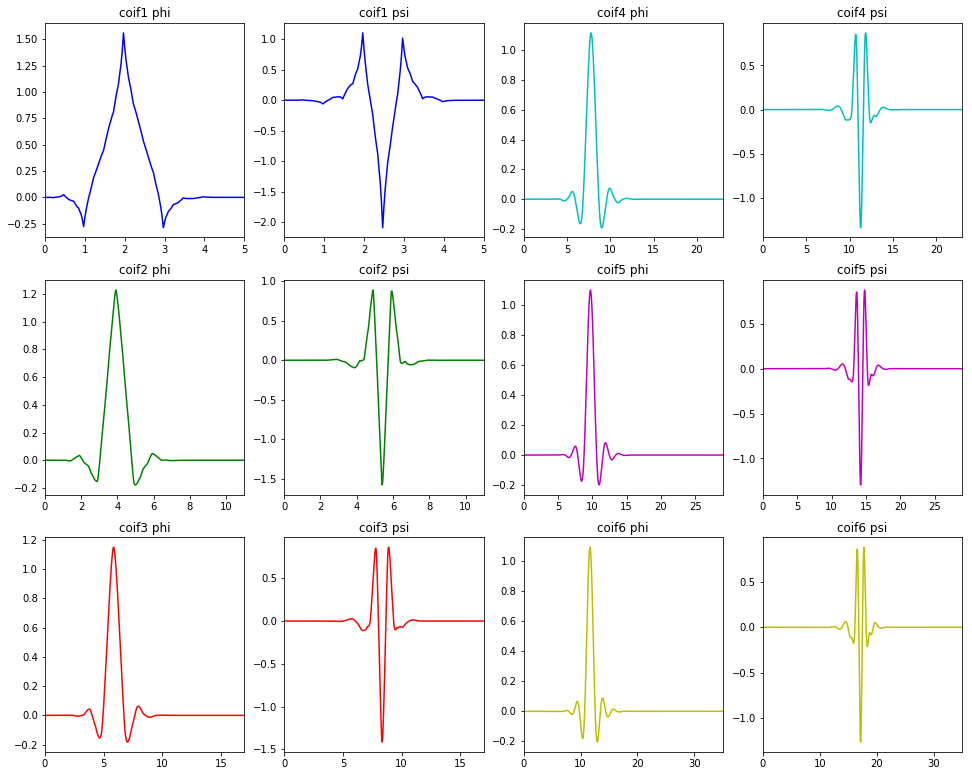

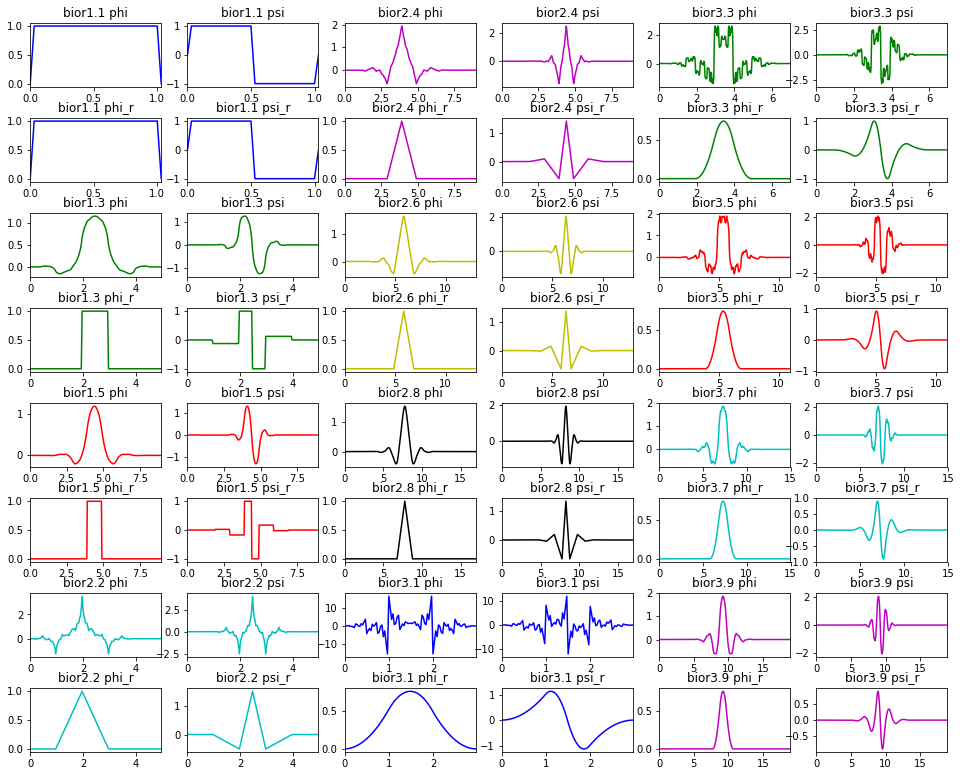

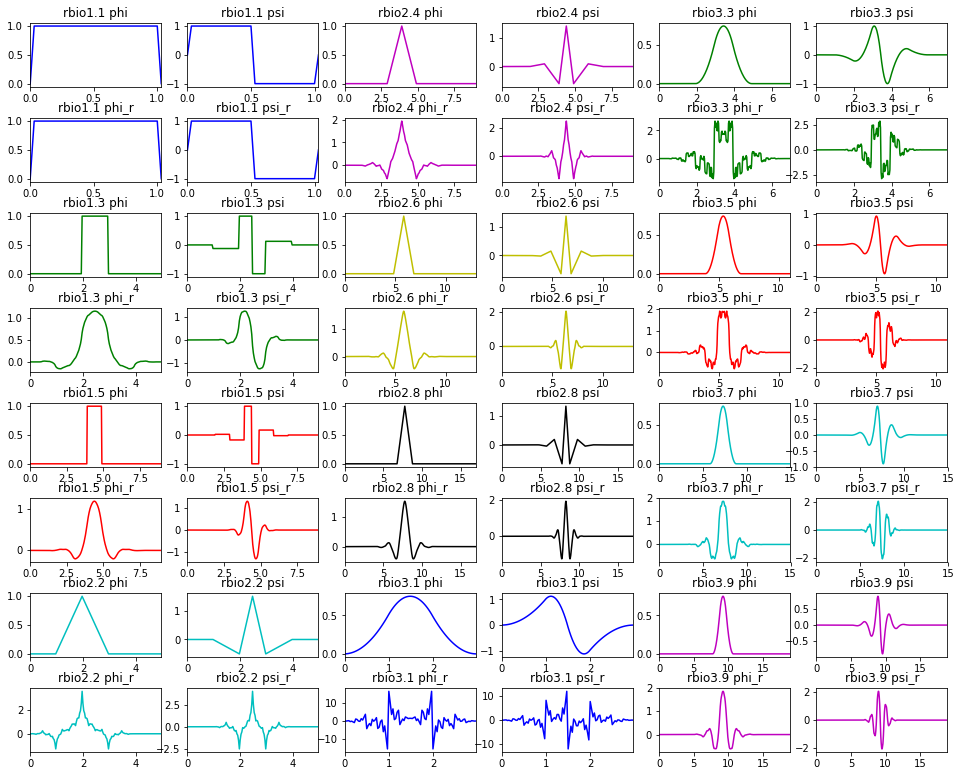

In [13]:
plot_data = [('db', (4, 3)),
             ('sym', (4, 3)),
             ('coif', (3, 2))]


for family, (rows, cols) in plot_data:
    fig = plt.figure()
    fig.subplots_adjust(hspace=0.2, wspace=0.2, bottom=.02, left=.06,
                        right=.97, top=.94)
    colors = itertools.cycle('bgrcmyk')

    wnames = pywt.wavelist(family)
    i = iter(wnames)
    for col in range(cols):
        for row in range(rows):
            try:
                wavelet = pywt.Wavelet(next(i))
            except StopIteration:
                break
            phi, psi, x = wavelet.wavefun(level=5)

            color = next(colors)
            ax = fig.add_subplot(rows, 2 * cols, 1 + 2 * (col + row * cols))
            ax.set_title(wavelet.name + " phi")
            ax.plot(x, phi, color)
            ax.set_xlim(min(x), max(x))

            ax = fig.add_subplot(rows, 2*cols, 1 + 2*(col + row*cols) + 1)
            ax.set_title(wavelet.name + " psi")
            ax.plot(x, psi, color)
            ax.set_xlim(min(x), max(x))

for family, (rows, cols) in [('bior', (4, 3)), ('rbio', (4, 3))]:
    fig = plt.figure()
    fig.subplots_adjust(hspace=0.5, wspace=0.2, bottom=.02, left=.06,
                        right=.97, top=.94)

    colors = itertools.cycle('bgrcmyk')
    wnames = pywt.wavelist(family)
    i = iter(wnames)
    for col in range(cols):
        for row in range(rows):
            try:
                wavelet = pywt.Wavelet(next(i))
            except StopIteration:
                break
            phi, psi, phi_r, psi_r, x = wavelet.wavefun(level=5)
            row *= 2

            color = next(colors)
            ax = fig.add_subplot(2*rows, 2*cols, 1 + 2*(col + row*cols))
            ax.set_title(wavelet.name + " phi")
            ax.plot(x, phi, color)
            ax.set_xlim(min(x), max(x))

            ax = fig.add_subplot(2*rows, 2*cols, 2*(1 + col + row*cols))
            ax.set_title(wavelet.name + " psi")
            ax.plot(x, psi, color)
            ax.set_xlim(min(x), max(x))

            row += 1
            ax = fig.add_subplot(2*rows, 2*cols, 1 + 2*(col + row*cols))
            ax.set_title(wavelet.name + " phi_r")
            ax.plot(x, phi_r, color)
            ax.set_xlim(min(x), max(x))

            ax = fig.add_subplot(2*rows, 2*cols, 1 + 2*(col + row*cols) + 1)
            ax.set_title(wavelet.name + " psi_r")
            ax.plot(x, psi_r, color)
            ax.set_xlim(min(x), max(x))

plt.show()

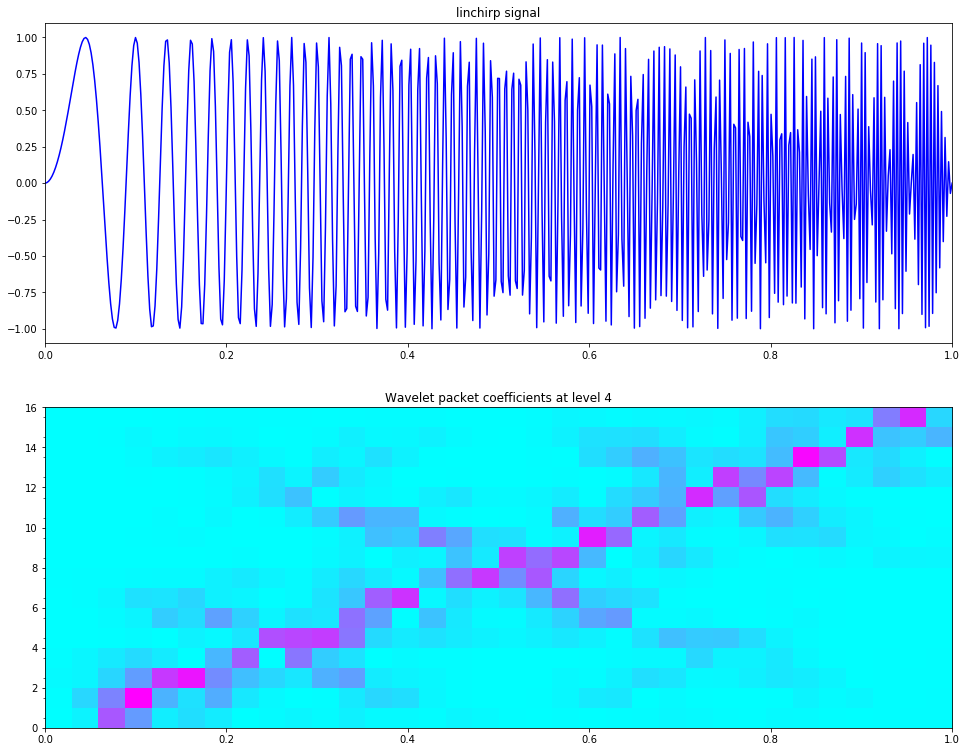

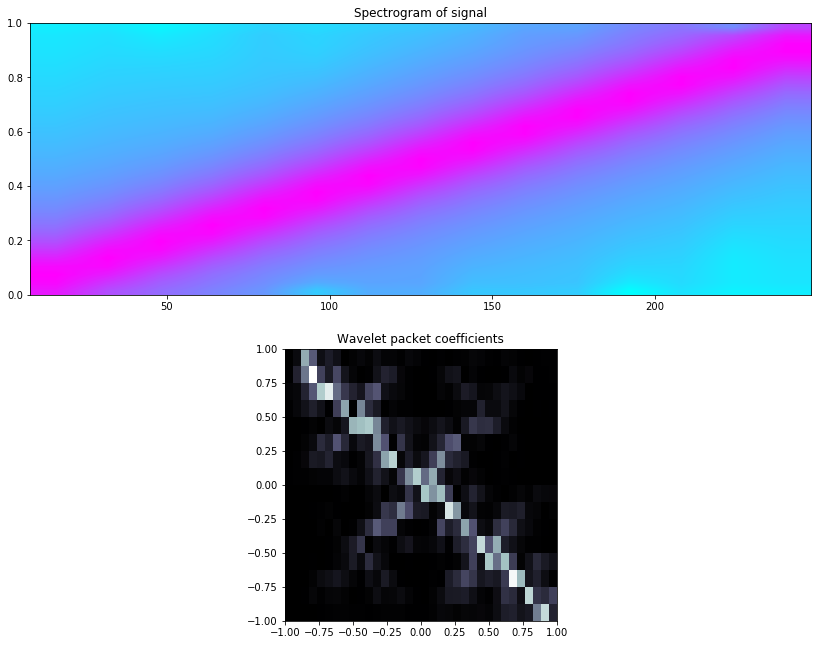

In [14]:
import numpy as np
import matplotlib.pyplot as plt

import pywt


x = np.linspace(0, 1, num=512)
data = np.sin(250 * np.pi * x**2)

wavelet = 'db2'
level = 4
order = "freq"  # other option is "normal"
interpolation = 'nearest'
cmap = plt.cm.cool

# Construct wavelet packet
wp = pywt.WaveletPacket(data, wavelet, 'symmetric', maxlevel=level)
nodes = wp.get_level(level, order=order)
labels = [n.path for n in nodes]
values = np.array([n.data for n in nodes], 'd')
values = abs(values)

# Show signal and wavelet packet coefficients
fig = plt.figure()
fig.subplots_adjust(hspace=0.2, bottom=.03, left=.07, right=.97, top=.92)
ax = fig.add_subplot(2, 1, 1)
ax.set_title("linchirp signal")
ax.plot(x, data, 'b')
ax.set_xlim(0, x[-1])

ax = fig.add_subplot(2, 1, 2)
ax.set_title("Wavelet packet coefficients at level %d" % level)
ax.imshow(values, interpolation=interpolation, cmap=cmap, aspect="auto",
          origin="lower", extent=[0, 1, 0, len(values)])
ax.set_yticks(np.arange(0.5, len(labels) + 0.5), labels)

# Show spectrogram and wavelet packet coefficients
fig2 = plt.figure()
ax2 = fig2.add_subplot(211)
ax2.specgram(data, NFFT=64, noverlap=32, Fs=2, cmap=cmap,
             interpolation='bilinear')
ax2.set_title("Spectrogram of signal")
ax3 = fig2.add_subplot(212)
ax3.imshow(values, origin='upper', extent=[-1, 1, -1, 1],
           interpolation='nearest')
ax3.set_title("Wavelet packet coefficients")


plt.show()

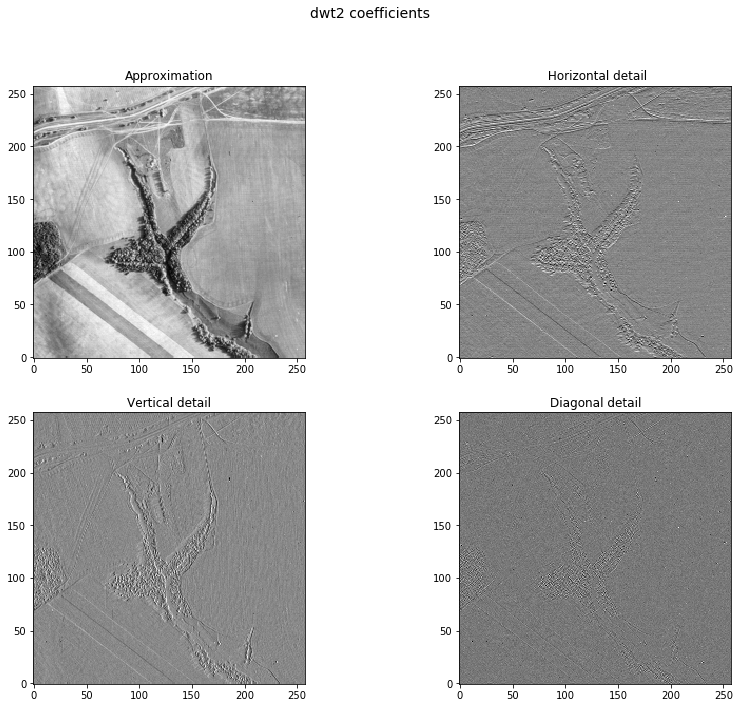

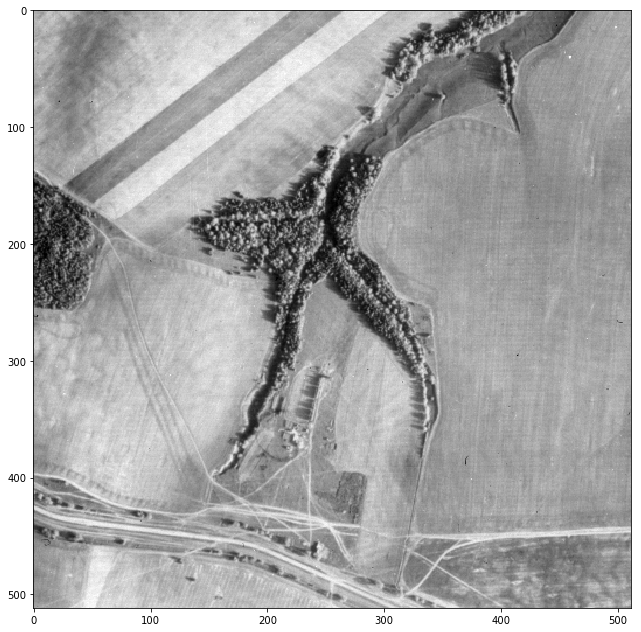

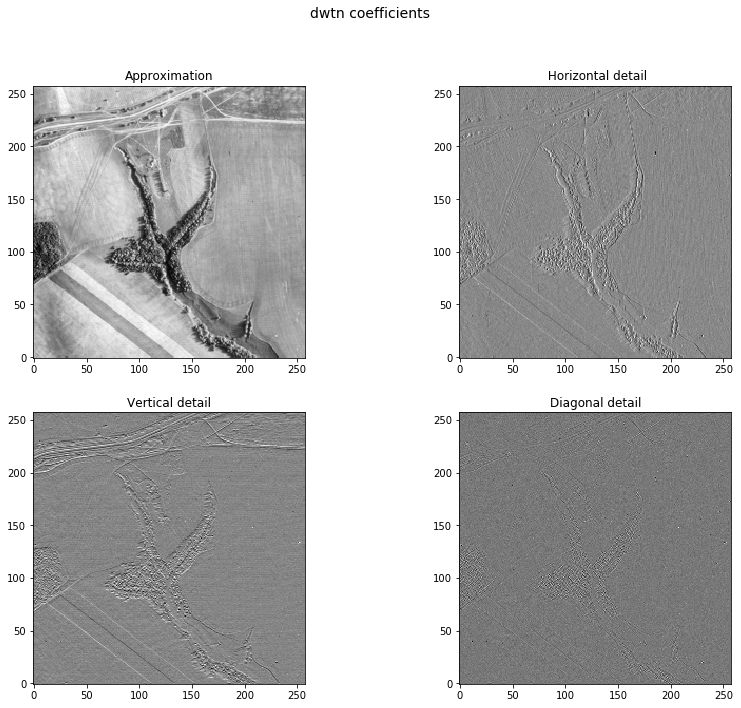

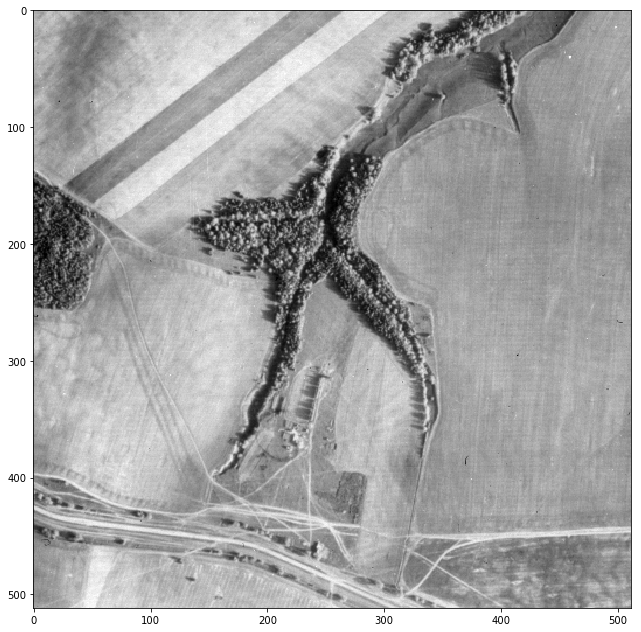

In [15]:
import numpy as np
import matplotlib.pyplot as plt

import pywt
import pywt.data


# Load image
original = pywt.data.aero()

# Wavelet transform of image, and plot approximation and details
titles = ['Approximation', ' Horizontal detail',
          'Vertical detail', 'Diagonal detail']
coeffs2 = pywt.dwt2(original, 'bior1.3')
LL, (LH, HL, HH) = coeffs2
fig = plt.figure()
for i, a in enumerate([LL, LH, HL, HH]):
    ax = fig.add_subplot(2, 2, i + 1)
    ax.imshow(a, origin='image', interpolation="nearest", cmap=plt.cm.gray)
    ax.set_title(titles[i], fontsize=12)

fig.suptitle("dwt2 coefficients", fontsize=14)

# Now reconstruct and plot the original image
reconstructed = pywt.idwt2(coeffs2, 'bior1.3')
fig = plt.figure()
plt.imshow(reconstructed, interpolation="nearest", cmap=plt.cm.gray)

# Check that reconstructed image is close to the original
np.testing.assert_allclose(original, reconstructed, atol=1e-13, rtol=1e-13)


# Now do the same with dwtn/idwtn, to show the difference in their signatures

coeffsn = pywt.dwtn(original, 'bior1.3')
fig = plt.figure()
for i, key in enumerate(['aa', 'ad', 'da', 'dd']):
    ax = fig.add_subplot(2, 2, i + 1)
    ax.imshow(coeffsn[key], origin='image', interpolation="nearest",
              cmap=plt.cm.gray)
    ax.set_title(titles[i], fontsize=12)

fig.suptitle("dwtn coefficients", fontsize=14)

# Now reconstruct and plot the original image
reconstructed = pywt.idwtn(coeffsn, 'bior1.3')
fig = plt.figure()
plt.imshow(reconstructed, interpolation="nearest", cmap=plt.cm.gray)

# Check that reconstructed image is close to the original
np.testing.assert_allclose(original, reconstructed, atol=1e-13, rtol=1e-13)


plt.show()

('  1/35', '       20')
('  2/35', '       50')
('  3/35', '      100')
('  4/35', '      120')
('  5/35', '      150')
('  6/35', '      200')
('  7/35', '      250')
('  8/35', '      300')
('  9/35', '      400')
(' 10/35', '      500')
(' 11/35', '      600')
(' 12/35', '      750')
(' 13/35', '     1000')
(' 14/35', '     2000')
(' 15/35', '     3000')
(' 16/35', '     4000')
(' 17/35', '     5000')
(' 18/35', '     6000')
(' 19/35', '     7500')
(' 20/35', '    10000')
(' 21/35', '    15000')
(' 22/35', '    20000')
(' 23/35', '    25000')
(' 24/35', '    30000')
(' 25/35', '    40000')
(' 26/35', '    50000')
(' 27/35', '    75000')
(' 28/35', '   100000')
(' 29/35', '   150000')
(' 30/35', '   200000')
(' 31/35', '   250000')
(' 32/35', '   300000')
(' 33/35', '   400000')
(' 34/35', '   500000')
(' 35/35', '   600000')


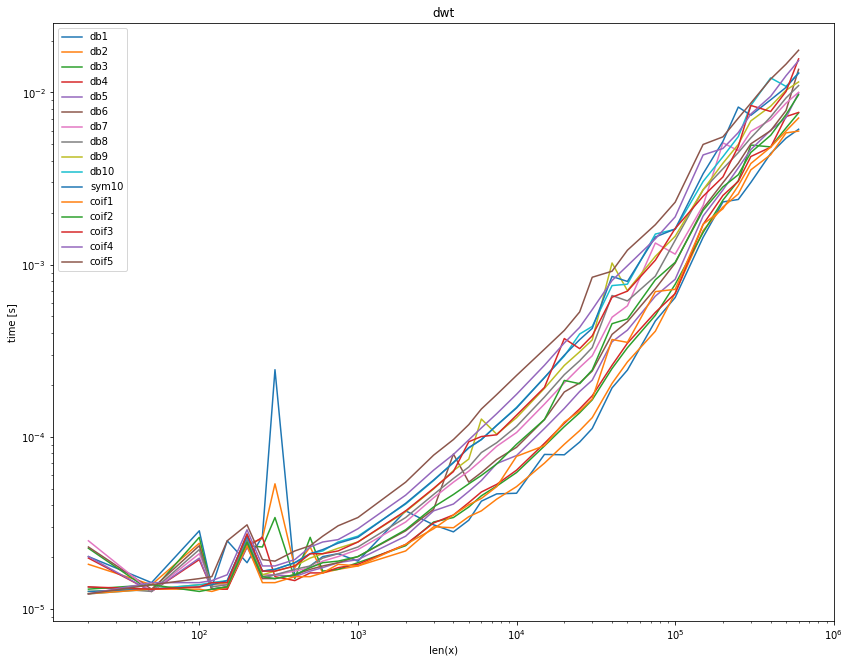

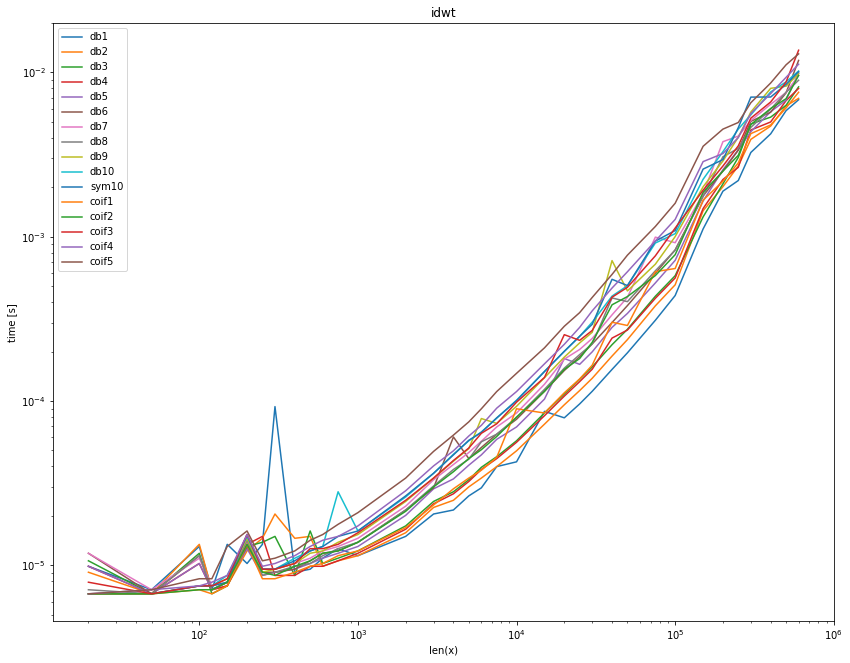

In [16]:
import gc
import sys
import time

import numpy as np
import matplotlib.pyplot as plt

import pywt


if sys.platform == 'win32':
    clock = time.clock
else:
    clock = time.time

sizes = [20, 50, 100, 120, 150, 200, 250, 300, 400, 500, 600, 750,
         1000, 2000, 3000, 4000, 5000, 6000, 7500,
         10000, 15000, 20000, 25000, 30000, 40000, 50000, 75000,
         100000, 150000, 200000, 250000, 300000, 400000, 500000,
         600000, 750000, 1000000, 2000000, 5000000][:-4]

wavelet_names = ['db1', 'db2', 'db3', 'db4', 'db5', 'db6', 'db7',
                 'db8', 'db9', 'db10', 'sym10', 'coif1', 'coif2',
                 'coif3', 'coif4', 'coif5']


wavelets = [pywt.Wavelet(n) for n in wavelet_names]
mode = pywt.Modes.zero

times_dwt = [[] for i in range(len(wavelets))]
times_idwt = [[] for i in range(len(wavelets))]

for j, size in enumerate(sizes):
    data = np.ones((size,), dtype=np.float64)
    print((("%d/%d" % (j + 1, len(sizes))).rjust(6), str(size).rjust(9)))
    for i, w in enumerate(wavelets):
        min_t1, min_t2 = 9999., 9999.
        for _ in range(5):
            # Repeat timing 5 times to reduce run-to-run variation
            t1 = clock()
            (a, d) = pywt.dwt(data, w, mode)
            t1 = clock() - t1
            min_t1 = min(t1, min_t1)

            t2 = clock()
            a0 = pywt.idwt(a, d, w, mode)
            t2 = clock() - t2
            min_t2 = min(t2, min_t2)

        times_dwt[i].append(min_t1)
        times_idwt[i].append(min_t2)

    gc.collect()


for j, (times, name) in enumerate([(times_dwt, 'dwt'), (times_idwt, 'idwt')]):
    fig = plt.figure(j)
    ax = fig.add_subplot(111)
    ax.set_title(name)

    for i, n in enumerate(wavelet_names):
        ax.loglog(sizes, times[i], label=n)

    ax.legend(loc='best')
    ax.set_xlabel('len(x)')
    ax.set_ylabel('time [s]')


plt.show()

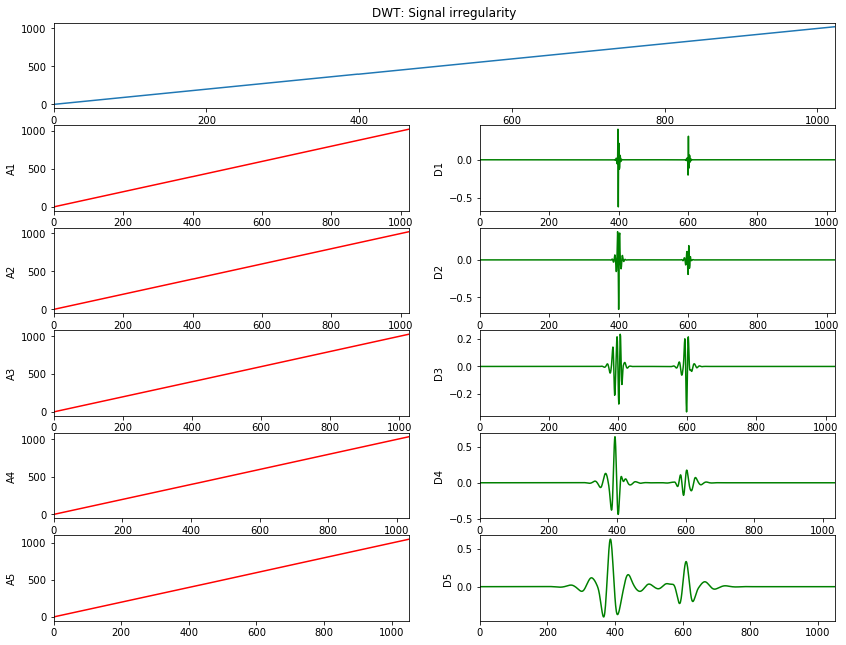

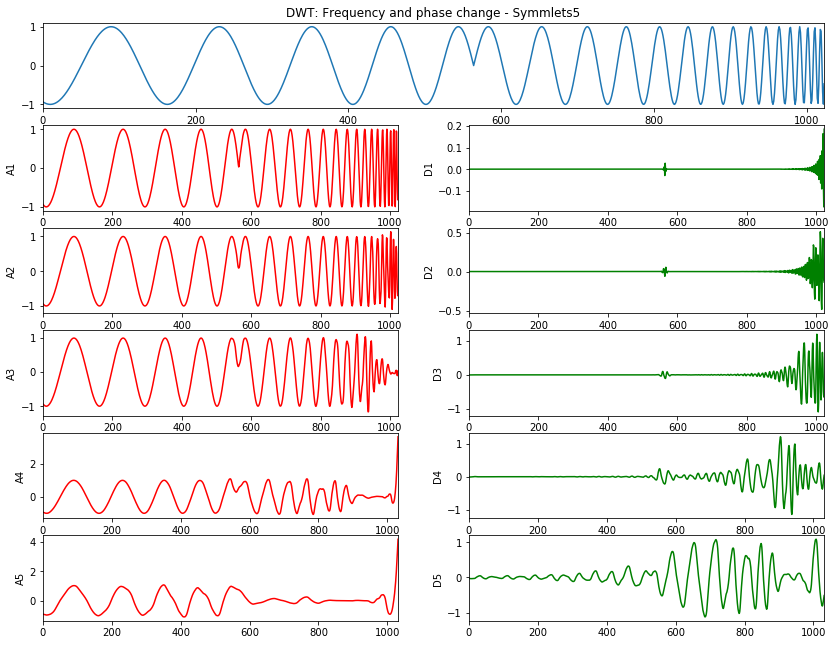

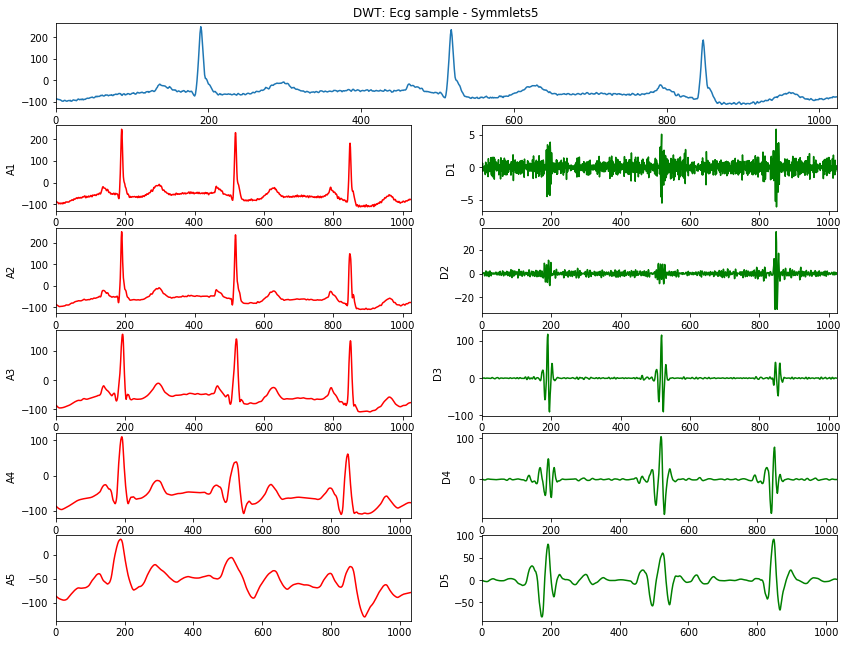

In [17]:
import numpy as np
import matplotlib.pyplot as plt

import pywt
import pywt.data


ecg = pywt.data.ecg()

data1 = np.concatenate((np.arange(1, 400),
                        np.arange(398, 600),
                        np.arange(601, 1024)))
x = np.linspace(0.082, 2.128, num=1024)[::-1]
data2 = np.sin(40 * np.log(x)) * np.sign((np.log(x)))

mode = pywt.Modes.smooth


def plot_signal_decomp(data, w, title):
    """Decompose and plot a signal S.
    S = An + Dn + Dn-1 + ... + D1
    """
    w = pywt.Wavelet(w)
    a = data
    ca = []
    cd = []
    for i in range(5):
        (a, d) = pywt.dwt(a, w, mode)
        ca.append(a)
        cd.append(d)

    rec_a = []
    rec_d = []

    for i, coeff in enumerate(ca):
        coeff_list = [coeff, None] + [None] * i
        rec_a.append(pywt.waverec(coeff_list, w))

    for i, coeff in enumerate(cd):
        coeff_list = [None, coeff] + [None] * i
        rec_d.append(pywt.waverec(coeff_list, w))

    fig = plt.figure()
    ax_main = fig.add_subplot(len(rec_a) + 1, 1, 1)
    ax_main.set_title(title)
    ax_main.plot(data)
    ax_main.set_xlim(0, len(data) - 1)

    for i, y in enumerate(rec_a):
        ax = fig.add_subplot(len(rec_a) + 1, 2, 3 + i * 2)
        ax.plot(y, 'r')
        ax.set_xlim(0, len(y) - 1)
        ax.set_ylabel("A%d" % (i + 1))

    for i, y in enumerate(rec_d):
        ax = fig.add_subplot(len(rec_d) + 1, 2, 4 + i * 2)
        ax.plot(y, 'g')
        ax.set_xlim(0, len(y) - 1)
        ax.set_ylabel("D%d" % (i + 1))


plot_signal_decomp(data1, 'coif5', "DWT: Signal irregularity")
plot_signal_decomp(data2, 'sym5',
                   "DWT: Frequency and phase change - Symmlets5")
plot_signal_decomp(ecg, 'sym5', "DWT: Ecg sample - Symmlets5")


plt.show()

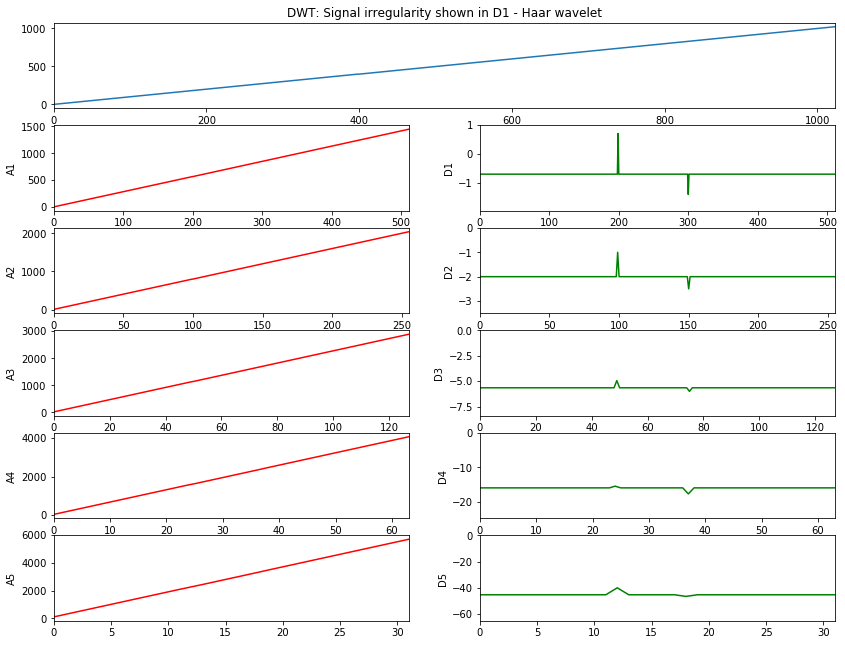

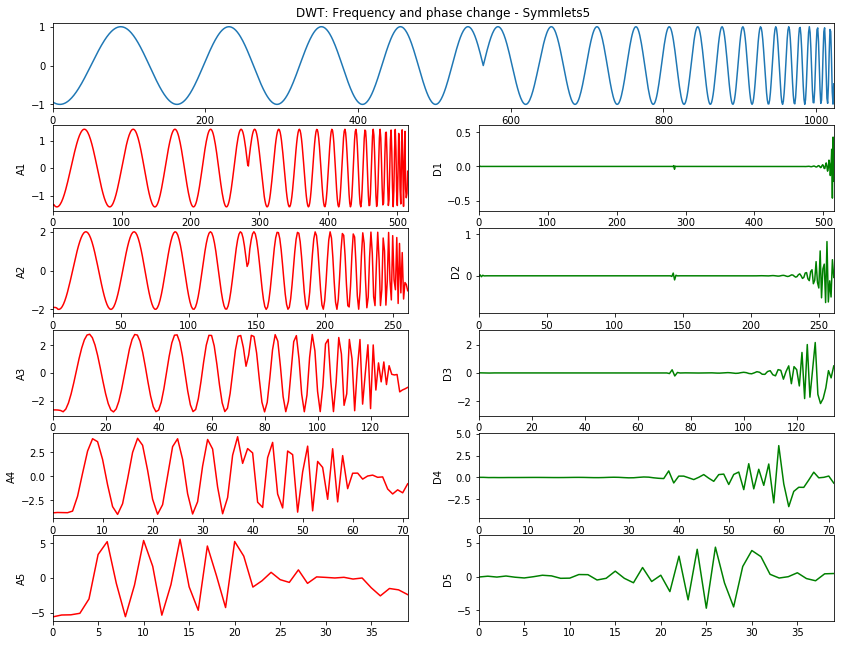

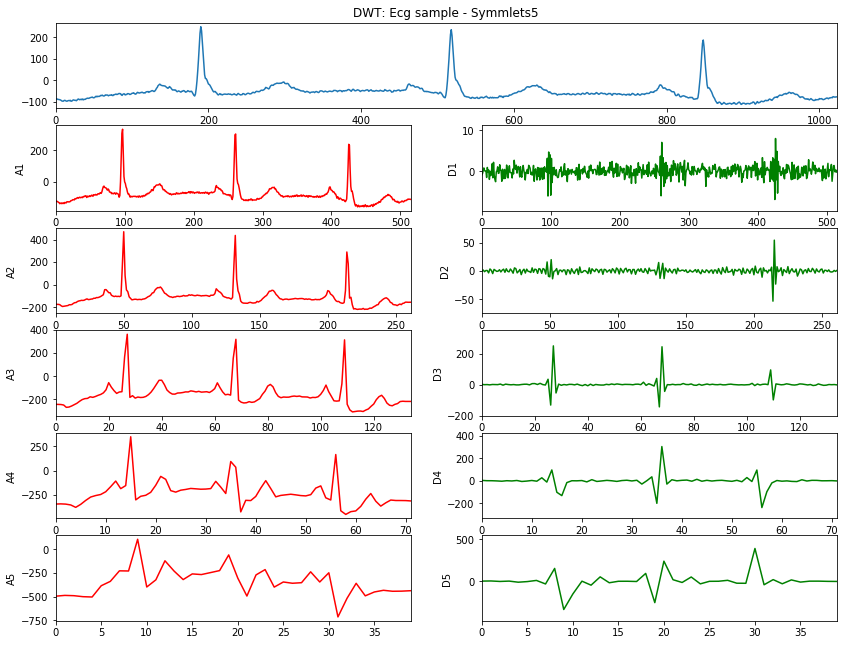

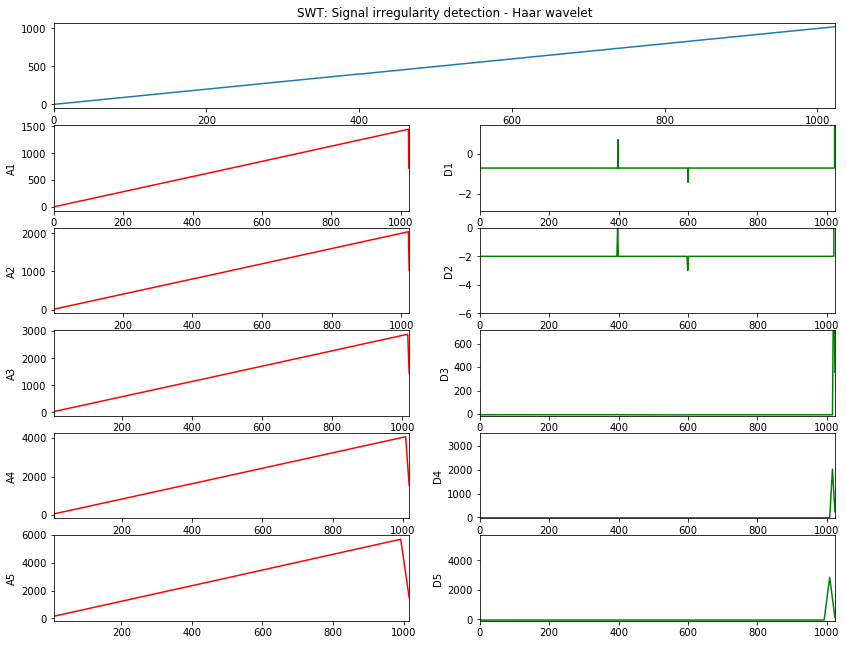

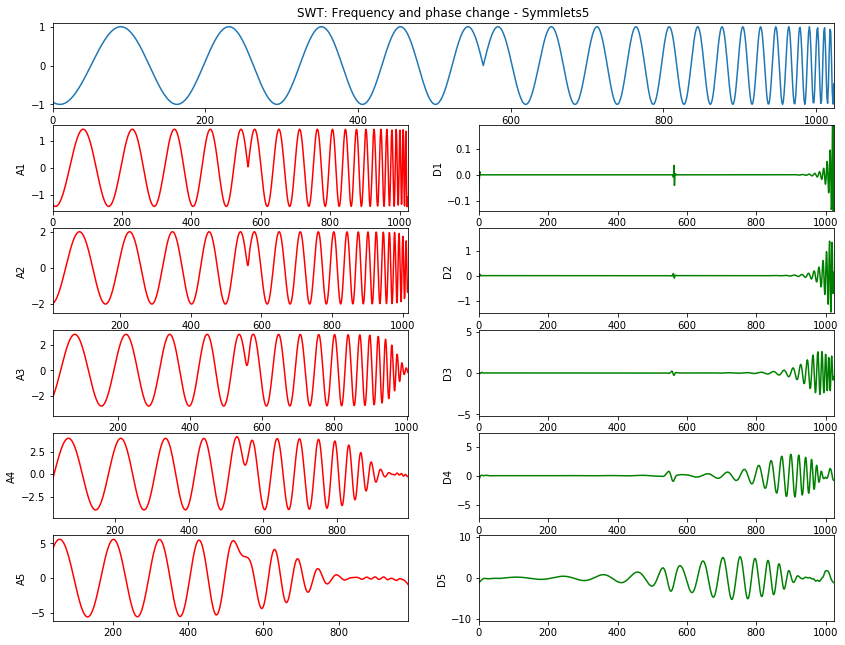

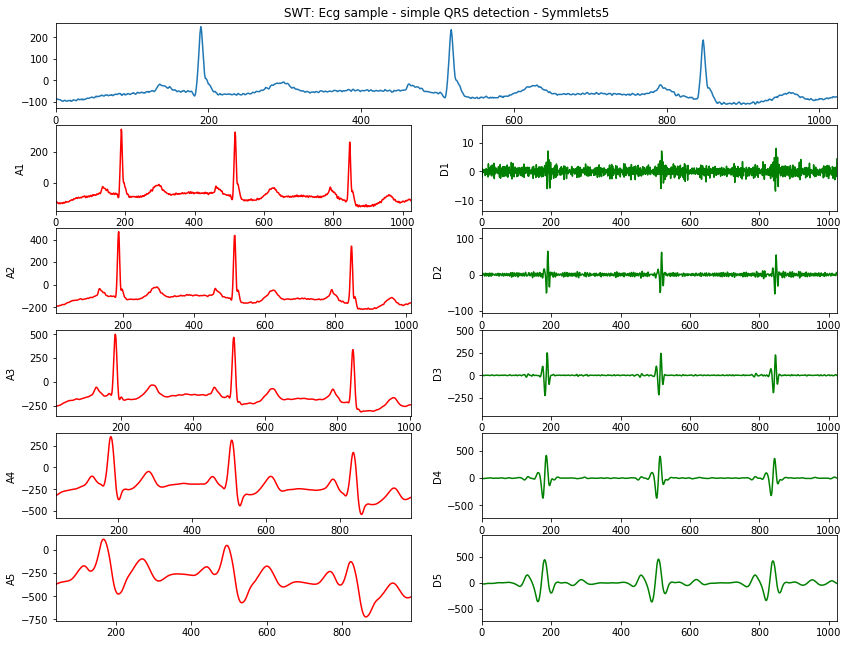

In [18]:
import numpy as np
import matplotlib.pyplot as plt

import pywt
import pywt.data


ecg = pywt.data.ecg()

data1 = np.concatenate((np.arange(1, 400),
                        np.arange(398, 600),
                        np.arange(601, 1024)))
x = np.linspace(0.082, 2.128, num=1024)[::-1]
data2 = np.sin(40 * np.log(x)) * np.sign((np.log(x)))

mode = pywt.Modes.sp1DWT = 1


def plot_coeffs(data, w, title, use_dwt=True):
    """Show dwt or swt coefficients for given data and wavelet."""
    w = pywt.Wavelet(w)
    a = data
    ca = []
    cd = []

    if use_dwt:
        for i in range(5):
            (a, d) = pywt.dwt(a, w, mode)
            ca.append(a)
            cd.append(d)
    else:
        coeffs = pywt.swt(data, w, 5)  # [(cA5, cD5), ..., (cA1, cD1)]
        for a, d in reversed(coeffs):
            ca.append(a)
            cd.append(d)

    fig = plt.figure()
    ax_main = fig.add_subplot(len(ca) + 1, 1, 1)
    ax_main.set_title(title)
    ax_main.plot(data)
    ax_main.set_xlim(0, len(data) - 1)

    for i, x in enumerate(ca):
        ax = fig.add_subplot(len(ca) + 1, 2, 3 + i * 2)
        ax.plot(x, 'r')
        ax.set_ylabel("A%d" % (i + 1))
        if use_dwt:
            ax.set_xlim(0, len(x) - 1)
        else:
            ax.set_xlim(w.dec_len * i, len(x) - 1 - w.dec_len * i)

    for i, x in enumerate(cd):
        ax = fig.add_subplot(len(cd) + 1, 2, 4 + i * 2)
        ax.plot(x, 'g')
        ax.set_ylabel("D%d" % (i + 1))
        # Scale axes
        ax.set_xlim(0, len(x) - 1)
        if use_dwt:
            ax.set_ylim(min(0, 1.4 * min(x)), max(0, 1.4 * max(x)))
        else:
            vals = x[w.dec_len * (1 + i):len(x) - w.dec_len * (1 + i)]
            ax.set_ylim(min(0, 2 * min(vals)), max(0, 2 * max(vals)))


# Show DWT coefficients
use_dwt = True
plot_coeffs(data1, 'db1',
            "DWT: Signal irregularity shown in D1 - Haar wavelet",
            use_dwt)
plot_coeffs(data2, 'sym5', "DWT: Frequency and phase change - Symmlets5",
            use_dwt)
plot_coeffs(ecg, 'sym5', "DWT: Ecg sample - Symmlets5", use_dwt)

# Show DWT coefficients
use_dwt = False
plot_coeffs(data1, 'db1', "SWT: Signal irregularity detection - Haar wavelet",
            use_dwt)
plot_coeffs(data2, 'sym5', "SWT: Frequency and phase change - Symmlets5",
            use_dwt)
plot_coeffs(ecg, 'sym5', "SWT: Ecg sample - simple QRS detection - Symmlets5",
            use_dwt)


plt.show()

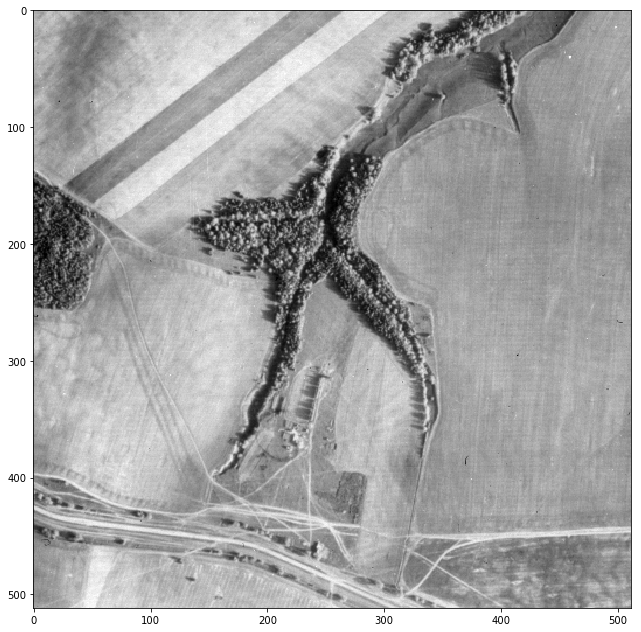

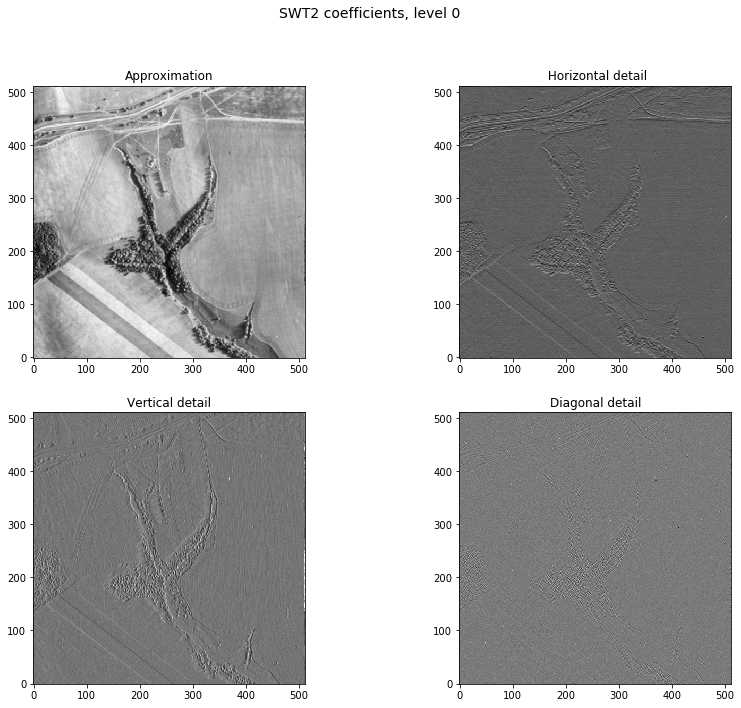

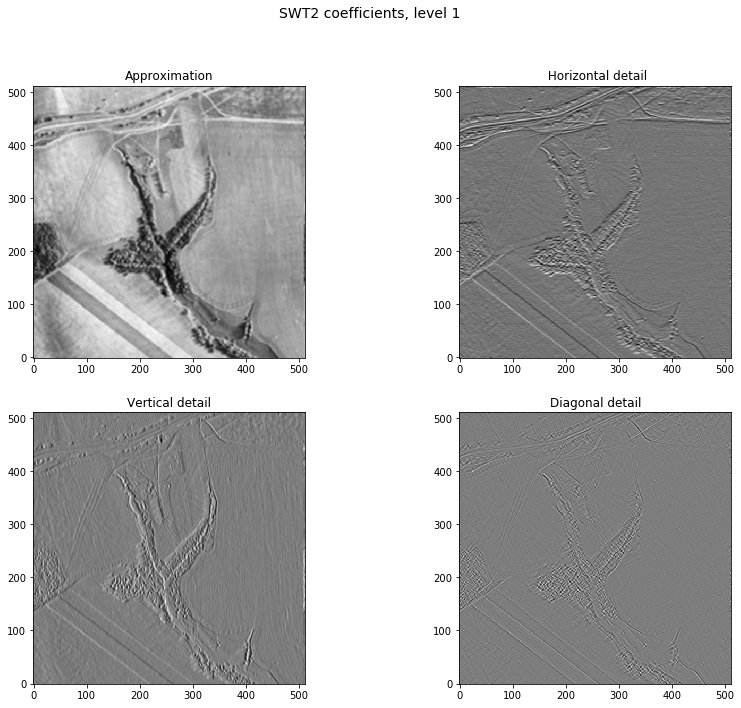

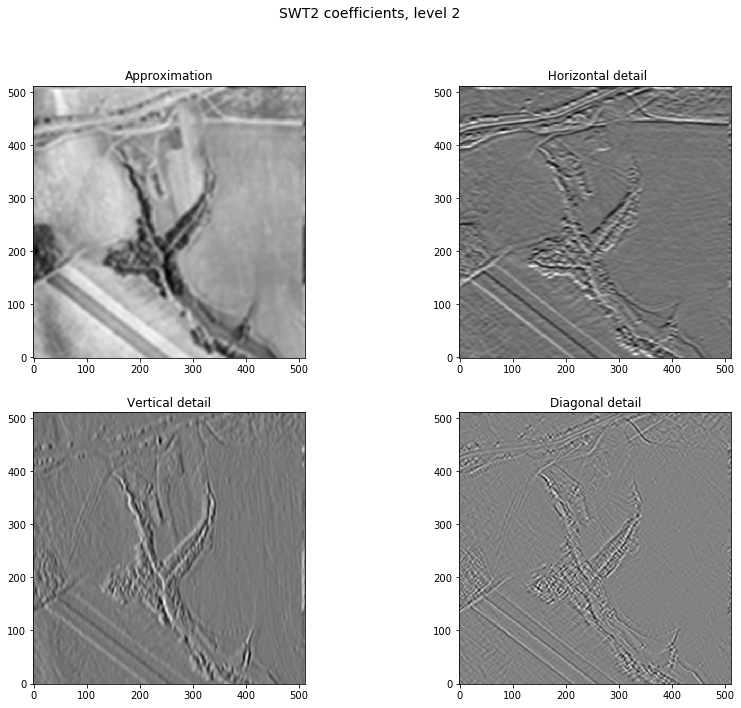

In [19]:
import matplotlib.pyplot as plt

import pywt
import pywt.data


arr = pywt.data.aero()

plt.imshow(arr, interpolation="nearest", cmap=plt.cm.gray)

level = 0
titles = ['Approximation', ' Horizontal detail',
          'Vertical detail', 'Diagonal detail']
for LL, (LH, HL, HH) in pywt.swt2(arr, 'bior1.3', level=3, start_level=0):
    fig = plt.figure()
    for i, a in enumerate([LL, LH, HL, HH]):
        ax = fig.add_subplot(2, 2, i + 1)
        ax.imshow(a, origin='image', interpolation="nearest", cmap=plt.cm.gray)
        ax.set_title(titles[i], fontsize=12)

    fig.suptitle("SWT2 coefficients, level %s" % level, fontsize=14)
    level += 1


plt.show()

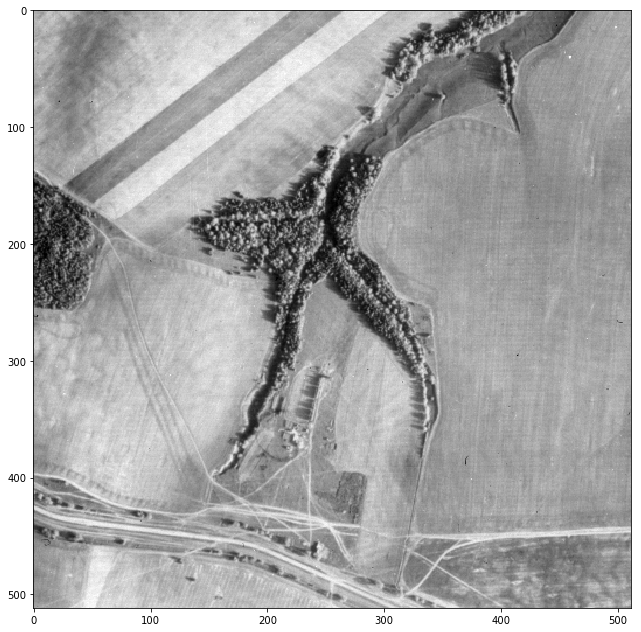

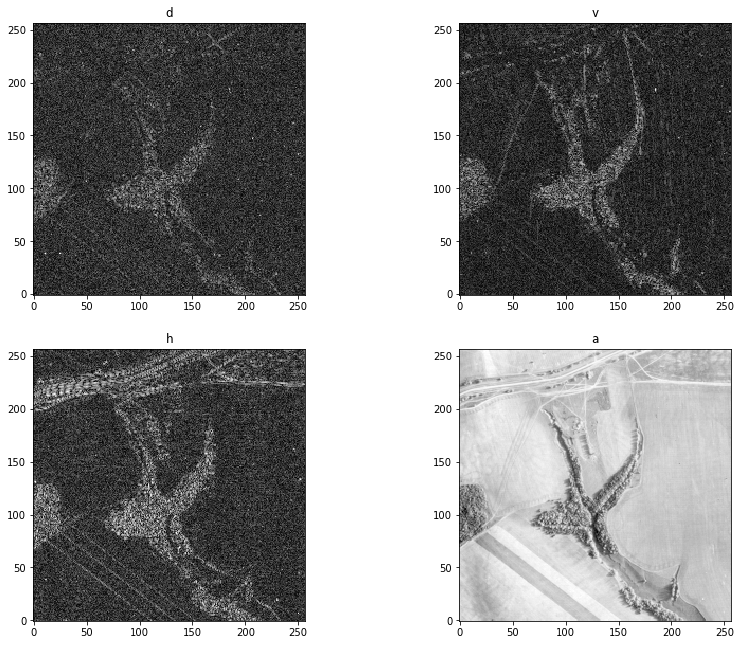

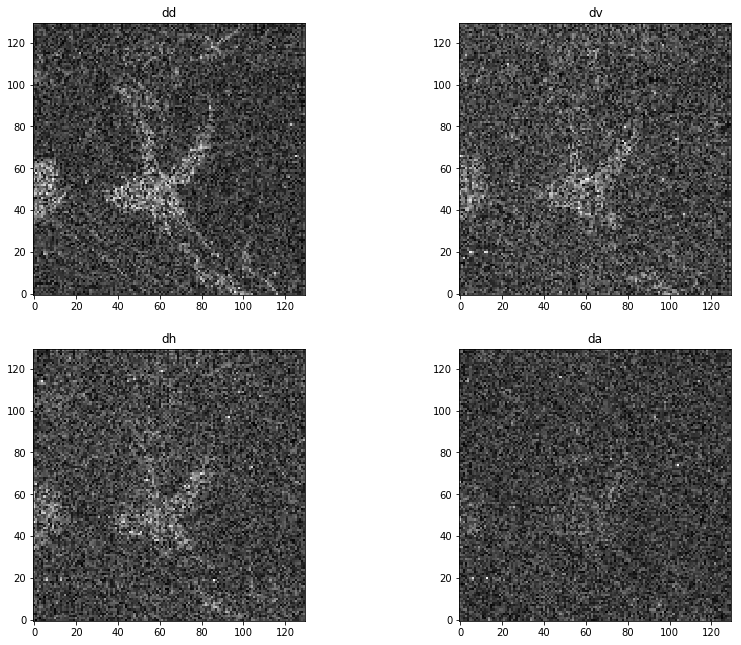

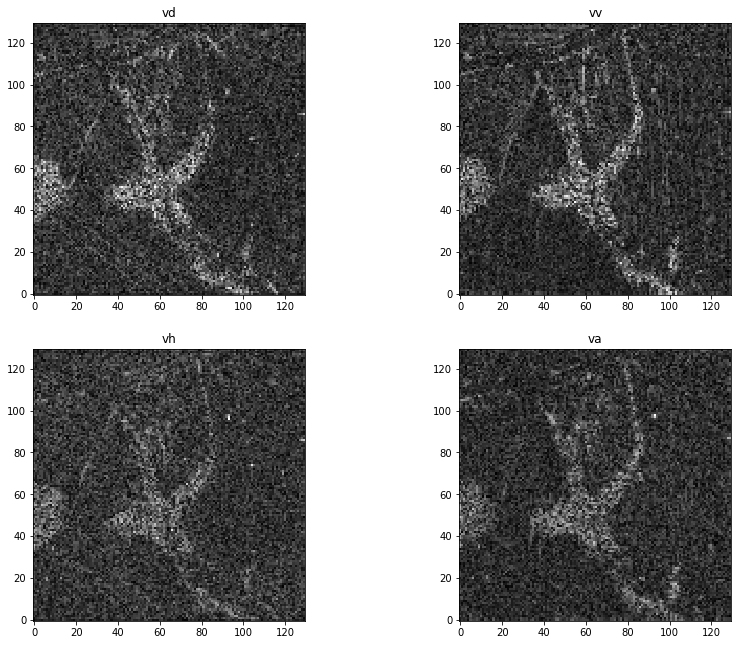

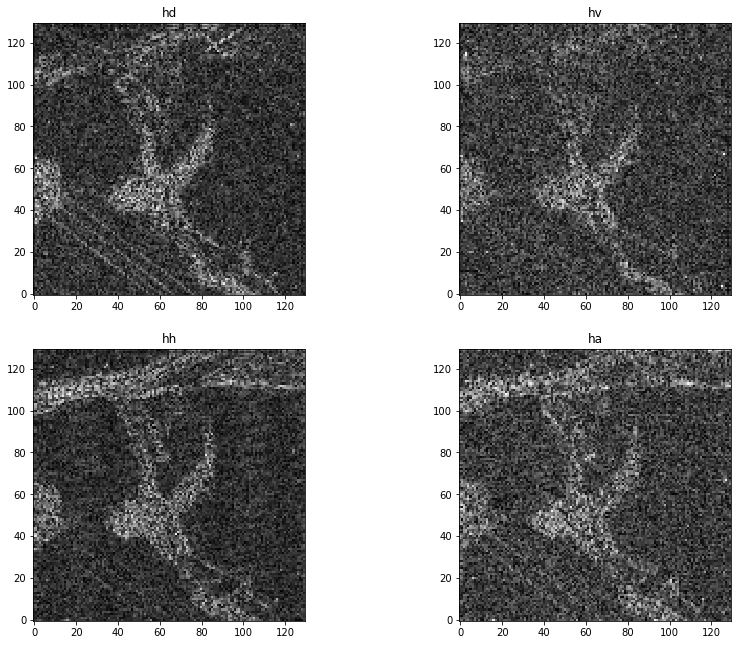

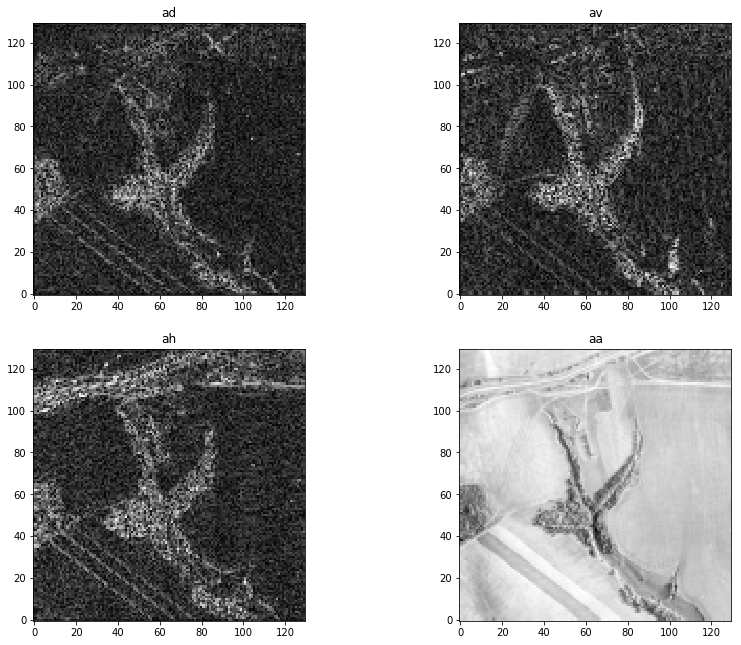

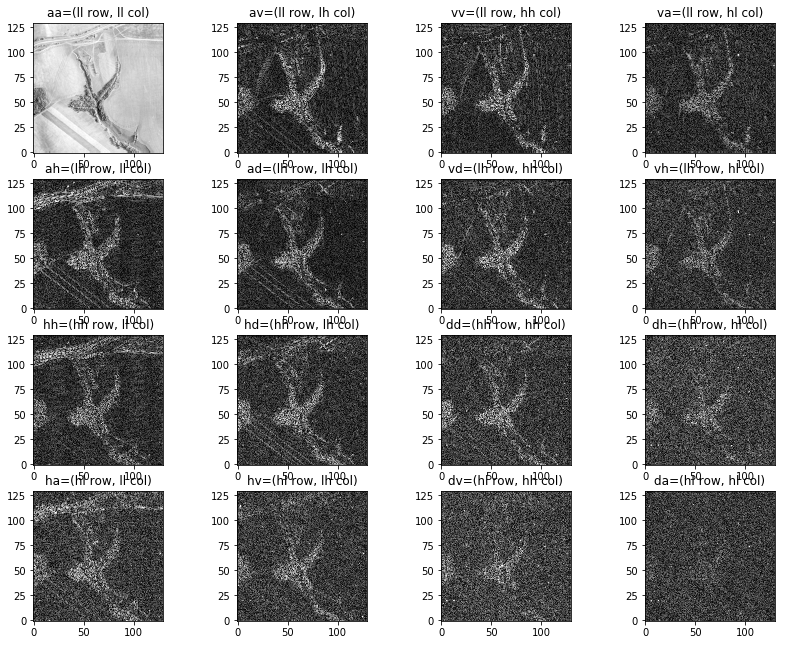

In [20]:
import numpy as np
import matplotlib.pyplot as plt

from pywt import WaveletPacket2D
import pywt.data


arr = pywt.data.aero()

wp2 = WaveletPacket2D(arr, 'db2', 'symmetric', maxlevel=2)

# Show original figure
plt.imshow(arr, interpolation="nearest", cmap=plt.cm.gray)

path = ['d', 'v', 'h', 'a']

# Show level 1 nodes
fig = plt.figure()
for i, p2 in enumerate(path):
    ax = fig.add_subplot(2, 2, i + 1)
    ax.imshow(np.sqrt(np.abs(wp2[p2].data)), origin='image',
              interpolation="nearest", cmap=plt.cm.gray)
    ax.set_title(p2)

# Show level 2 nodes
for p1 in path:
    fig = plt.figure()
    for i, p2 in enumerate(path):
        ax = fig.add_subplot(2, 2, i + 1)
        p1p2 = p1 + p2
        ax.imshow(np.sqrt(np.abs(wp2[p1p2].data)), origin='image',
                  interpolation="nearest", cmap=plt.cm.gray)
        ax.set_title(p1p2)

fig = plt.figure()
i = 1
for row in wp2.get_level(2, 'freq'):
    for node in row:
        ax = fig.add_subplot(len(row), len(row), i)
        ax.set_title("%s=(%s row, %s col)" % (
                     (node.path,) + wp2.expand_2d_path(node.path)))
        ax.imshow(np.sqrt(np.abs(node.data)), origin='image',
                  interpolation="nearest", cmap=plt.cm.gray)
        i += 1

plt.show()

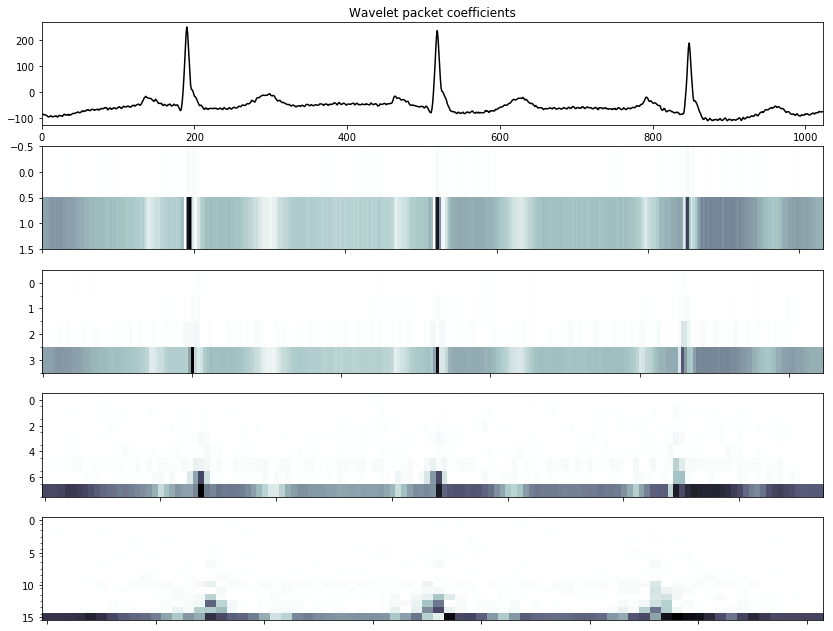

In [21]:
import os

import numpy as np
import matplotlib.pyplot as plt

from pywt import WaveletPacket
import pywt.data


ecg = pywt.data.ecg()

wp = WaveletPacket(ecg, 'sym5', maxlevel=4)

fig = plt.figure()
plt.set_cmap('bone')
ax = fig.add_subplot(wp.maxlevel + 1, 1, 1)
ax.plot(ecg, 'k')
ax.set_xlim(0, len(ecg) - 1)
ax.set_title("Wavelet packet coefficients")

for level in range(1, wp.maxlevel + 1):
    ax = fig.add_subplot(wp.maxlevel + 1, 1, level + 1)
    nodes = wp.get_level(level, "freq")
    nodes.reverse()
    labels = [n.path for n in nodes]
    values = -abs(np.array([n.data for n in nodes]))
    ax.imshow(values, interpolation='nearest', aspect='auto')
    ax.set_yticks(np.arange(len(labels) - 0.5, -0.5, -1), labels)
    plt.setp(ax.get_xticklabels(), visible=False)

plt.show()